In [1]:
import os
import tarfile
from six.moves import urllib

In [2]:
DATA_DIR = './datasets'

In [3]:
#디렉토리 만들기
if not os.path.isdir(DATA_DIR):
    os.makedirs(DATA_DIR)
    
#housing.tgz 다운로드
DATA_PAHT = os.path.join(DATA_DIR,"housing.tgz")
urllib.request.urlretrieve("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz",DATA_PAHT)

#압축풀기
tgz_file = tarfile.open(DATA_PAHT)
tgz_file.extractall(path=DATA_DIR)
tgz_file.close()

In [4]:
import pandas as pd

In [5]:
# CSV 파일읽기
def load_data(file_dir = DATA_DIR):
    csv_file = os.path.join(file_dir,'housing.csv')
    return pd.read_csv(csv_file)

housing = load_data()

In [6]:
#데이터에 관한 간략한 설명 보기
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
type(housing)

pandas.core.frame.DataFrame

In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [10]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

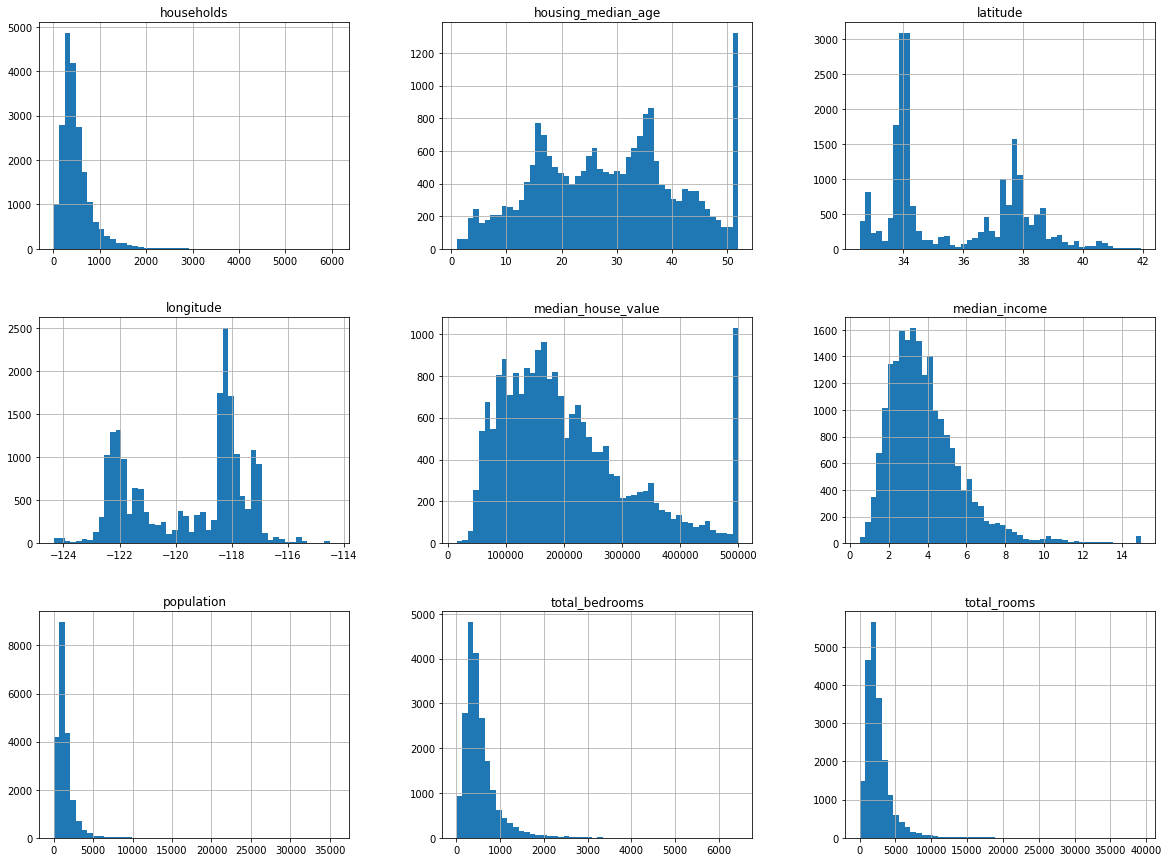

In [13]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# train : test = 80:20
train_set, test_set = train_test_split(housing,
                                      test_size = 0.2,
                                      random_state = 42)
print('train:{}, test:{}'.format(len(train_set),len(test_set)))

train:16512, test:4128


In [16]:
import numpy as np

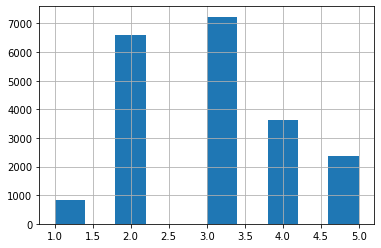

In [17]:
#소득의 카테고리 만들기
# 1.5 : 소득 카테고리 수를 제한하기 위한 값
housing['income_cat'] = np.ceil(housing['median_income']/1.5)

# 5이상인 값은 5로 정리
housing['income_cat'].where(housing['income_cat']<5,5.0,inplace = True)

# 히스토그램
housing['income_cat'].hist()

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

In [19]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['income_cat']):
    start_train_set = housing.loc[train_index]
    start_test_set = housing.loc[test_index]

# 소득 카테고리 비율 살펴보기
housing['income_cat'].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

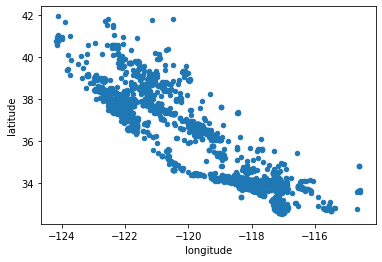

In [20]:
#훈련 데이터 복사
housing_scatter = start_test_set.copy()

# 위도, 경도에 따른 산점도 그리기
housing_scatter.plot(kind="scatter",x='longitude',y='latitude')

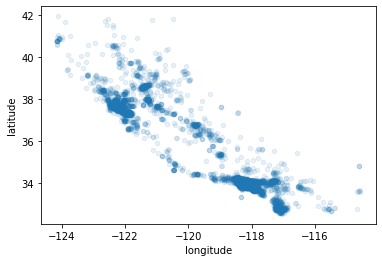

In [21]:
housing_scatter.plot(kind="scatter",x='longitude',y='latitude',alpha = 0.1)

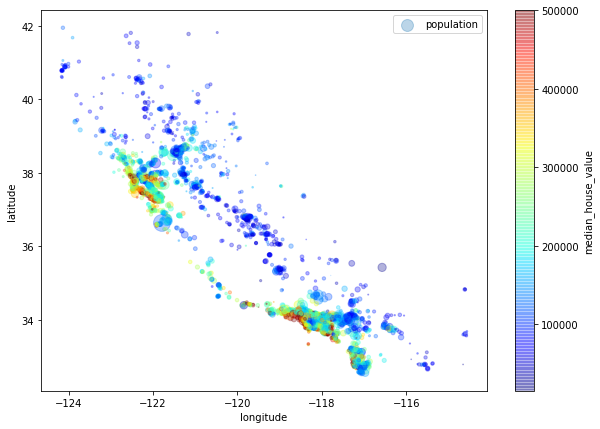

In [22]:
housing_scatter.plot(kind = 'scatter', x='longitude', y='latitude', alpha = 0.3,
                    s = housing_scatter['population']/100,
                    label = 'population',
                    figsize = (10,7),
                    c = 'median_house_value',
                    cmap=plt.get_cmap('jet'),
                    colorbar = True,
                    sharex=False)

In [23]:
housing_scatter.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
longitude,1.000000,-0.925427,-0.117459,0.028756,0.044227,0.069030,0.026599,0.002779,-0.039987,0.011422
latitude,-0.925427,1.000000,0.032739,-0.024544,-0.047030,-0.084602,-0.046336,-0.098780,-0.150124,-0.112382
housing_median_age,-0.117459,0.032739,1.000000,-0.350579,-0.304904,-0.287569,-0.290718,-0.150099,0.071357,-0.176924
total_rooms,0.028756,-0.024544,-0.350579,1.000000,0.933670,0.864076,0.918788,0.191765,0.131435,0.217090
total_bedrooms,0.044227,-0.047030,-0.304904,0.933670,1.000000,0.882714,0.978294,0.000079,0.057568,0.027294
population,0.069030,-0.084602,-0.287569,0.864076,0.882714,1.000000,0.916114,0.014374,-0.016033,0.036890
households,0.026599,-0.046336,-0.290718,0.918788,0.978294,0.916114,1.000000,0.021822,0.071242,0.051475
median_income,0.002779,-0.098780,-0.150099,0.191765,0.000079,0.014374,0.021822,1.000000,0.691831,0.905293
median_house_value,-0.039987,-0.150124,0.071357,0.131435,0.057568,-0.016033,0.071242,0.691831,1.000000,0.650512
income_cat,0.011422,-0.112382,-0.176924,0.217090,0.027294,0.036890,0.051475,0.905293,0.650512,1.000000


In [24]:
corr_matrix = housing_scatter.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691831
income_cat            0.650512
total_rooms           0.131435
housing_median_age    0.071357
households            0.071242
total_bedrooms        0.057568
population           -0.016033
longitude            -0.039987
latitude             -0.150124
Name: median_house_value, dtype: float64

In [25]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1196509e8>,
      dtype=object)

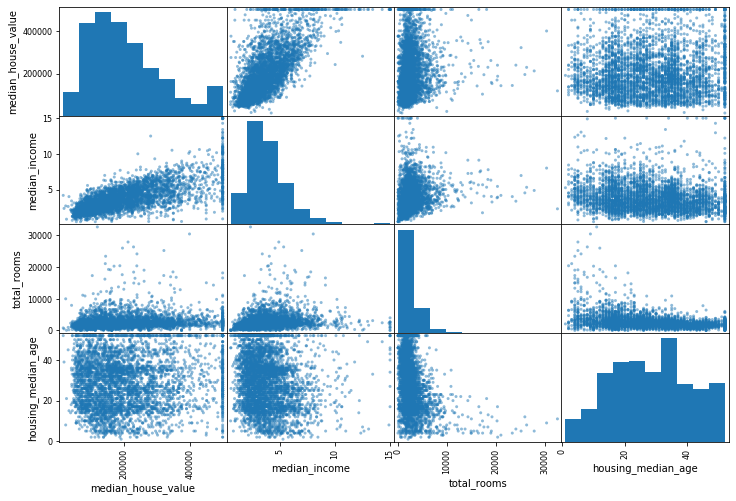

In [26]:
attributes = ['median_house_value','median_income',
             'total_rooms','housing_median_age']
scatter_matrix(housing_scatter[attributes],figsize=(12,8))

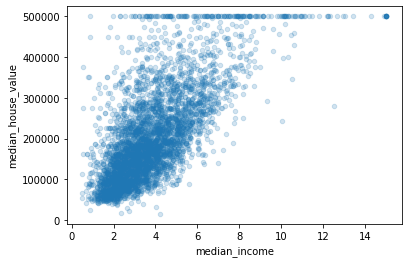

In [27]:
housing_scatter.plot(kind = 'scatter',x='median_income',
                    y='median_house_value',alpha=0.2)

# 특성들의 조합
- 방갯수
    - 가구 당 방 갯수
- 침대갯수
    - 방 갯수 대비 침대 갯수
- 인구
    - 가구 수에 대한 인구수

In [28]:
housing_scatter['rooms_per_household'] = housing_scatter['total_rooms']/housing_scatter['households']

housing_scatter['bedrooms_per_room'] = housing_scatter['total_bedrooms']/housing_scatter['total_rooms']

housing_scatter['population_per_household'] = housing_scatter['population']/housing_scatter['households']

In [29]:
corr_matrix = housing_scatter.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691831
income_cat                  0.650512
rooms_per_household         0.192575
total_rooms                 0.131435
housing_median_age          0.071357
households                  0.071242
total_bedrooms              0.057568
population                 -0.016033
longitude                  -0.039987
population_per_household   -0.135142
latitude                   -0.150124
bedrooms_per_room          -0.240362
Name: median_house_value, dtype: float64

# 알고리즘용 데이터 준비
## 데이터 정제

- 누락된 특성에 대한 처리
- total_bedrooms특성은 값이 없는 경우가 존재
- 데이터 정제 방법
    - 해당구역을 제거(행 삭제)
        - dropna()
    - 전체 특성을 삭제(열 삭제)
        - drop()
    - 특정 값으로 채우기(0, 평균값, 중간값,...)
        - fillna()

In [30]:
#훈련 데이터 복사
housing_copy_train = start_train_set.drop('median_house_value',axis=1)
housing_labels = start_train_set['median_house_value'].copy()
housing_copy_train.count()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
total_bedrooms        16354
population            16512
households            16512
median_income         16512
ocean_proximity       16512
income_cat            16512
dtype: int64

In [31]:
# 해당구역을 제거
hct_row_remove = housing_copy_train.dropna(subset=['total_bedrooms'])
hct_row_remove.count()

longitude             16354
latitude              16354
housing_median_age    16354
total_rooms           16354
total_bedrooms        16354
population            16354
households            16354
median_income         16354
ocean_proximity       16354
income_cat            16354
dtype: int64

In [32]:
# 특정 값으로 채움
median = housing_copy_train['total_bedrooms'].median()
housing_copy_train['total_bedrooms'].fillna(median,inplace = True)
housing_copy_train.count()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
total_bedrooms        16512
population            16512
households            16512
median_income         16512
ocean_proximity       16512
income_cat            16512
dtype: int64

In [33]:
hct_column_remove = housing_copy_train.drop('total_bedrooms',axis=1)
hct_column_remove.count()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
population            16512
households            16512
median_income         16512
ocean_proximity       16512
income_cat            16512
dtype: int64

In [34]:
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing  import Imputer

In [ ]:
#!pip install --upgrade scikit-learn==0.21.3

In [36]:
# 중간값으로 대체하는 객체 생성
# mean, median, most_frequent, constant
imputer = Imputer(strategy='median')

# 수치형 데이터만 선택
housing_num = housing_copy_train.drop('ocean_proximity',axis=1)

# 학습 및 변환
imputer.fit(housing_num)
X = imputer.transform(housing_num)

/Users/jeongjin-uk/anaconda3/envs/kisti_kaggle/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [37]:
#Pandas DataFrame으로 변환
housing_df = pd.DataFrame(X, columns=housing_num.columns,
                         index=list(housing_copy_train.index.values))
housing_df.count()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
total_bedrooms        16512
population            16512
households            16512
median_income         16512
income_cat            16512
dtype: int64

# 텍스트와 범주형 데이터 다루기
    - ocean_proximity
        - 범주형 데이터이므로 중간값을 계산할 수 없음
    - 카테고리 텍스트를 숫자로 바꾸기
        - pd.factorize()
            - 카테고리를 정수값으로 매핑

In [38]:
housing_cat = housing_copy_train['ocean_proximity']
housing_cat.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [39]:
housing_cat.factorize()

(array([0, 0, 1, ..., 2, 0, 3]),
 Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object'))

In [40]:
housing_cat_encoded, housing_categories = housing_cat.factorize()

In [41]:
housing_cat_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0])

In [42]:
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

- sklearn.OneHotEncoder()
    - 숫자로 된 범주형을 원-핫 벡터로 변환

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
encoder = OneHotEncoder()
# fit_transform()에는 2차원 배열을 넣어야함
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
#출력은 sparse matrix(scipy, sparse, csr, csr_matrix)
housing_cat_1hot

/Users/jeongjin-uk/anaconda3/envs/kisti_kaggle/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [46]:
# shape: (16354,5)
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [47]:
# 2차원(DataFrame) :  reshape(-1,1)과 같은 효과
housing_cat_2d = housing[['ocean_proximity']]

In [48]:
# default : sparse = True
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_2d)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

# 특성 스케일링(Feature Scaling)
- 입력값들의 스케일이 크게 다르면 알고리즘이 잘 작동하지 않음
    - total_rooms = 6 ~ 39320
    - median_income = 0 ~15
- 정규화(Normalization)
    - 모든 특성의 범위를 같게 만드는 방법
    - min-max scaling
        - 특성의 값을 0~1 사이 값이 되도록 조정
                X' = (X-X_min)/(X_max-Xmi_n)
        - sklearn.MinMaxScaler()
- 표준화(Standardization)
    - 평균이 0 , 분산이 1이 되도록 만듦
    - 범위의 상한 하한이 없음
    - outlier에 영향을 덜 받음
            X' = (X-mu)/sig
    - sklearn.StandatdScaler

# 파이프라인(pipeline)
    - 연속된 변환을 순서대로 처리할 수 있도록 도와줌
    - sklearn.Pipeline 클래스

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [50]:
num_pipeline = Pipeline([('imputer',Imputer(strategy = 'median')),
                        ('scaler',StandardScaler())])
housing_num_tr = num_pipeline.fit_transform(housing_num)

/Users/jeongjin-uk/anaconda3/envs/kisti_kaggle/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


# pipeline 결과 합치기
    - sklearn.compose.ColumnTransformer
    - 숫자형 컬럼변환 결과와 범주형 컬럼 변환결과를 하나로 합치기

In [51]:
from sklearn.compose import ColumnTransformer

In [52]:
num_attribs = list(housing_num)
cat_attribe = ['ocean_proximity']

full_pipeline = ColumnTransformer([('num',num_pipeline,num_attribs),
                                  ('cat',OneHotEncoder(),cat_attribe),])
housing_prepared = full_pipeline.fit_transform(housing_copy_train)
housing_prepared.shape

/Users/jeongjin-uk/anaconda3/envs/kisti_kaggle/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


(16512, 14)

# 모델 선택 & 모델 학습
    - 모델 선택
        - 선형회귀모델: sklearn.linear_model.LinearRegerssion
    - 모델 학습
        - fit()
    - 예측
        - predict()

In [53]:
# 선형회귀 모델
from sklearn.linear_model import LinearRegression

In [54]:
lin_reg = LinearRegression()
# 학습
lin_reg.fit(housing_prepared,housing_labels)
# 예측
sample_data = housing_copy_train.iloc[:5]
sample_labels = housing_labels.iloc[:5]
sample_data_prepared = full_pipeline.transform(sample_data)
print("predict:\n{}".format(lin_reg.predict(sample_data_prepared)))
print("target:\n{}".format(list(sample_labels)))

predict:
[205841.96139906 329060.05217695 205219.96047357  61859.01340291
 196908.23636333]
target:
[286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


# 평가

    - RMSE(Root Mean Squred Error): 평균 제곱근 오차

In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
housing_predict = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,
                            housing_predict)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68867.01067610044

# 다른모델 선택
    - Decision Tree : sklearn.tree.DecisionTreeRegressor

In [57]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

In [59]:
# 모델선택
tree_reg = DecisionTreeRegressor()
# 모델학습
tree_reg.fit(housing_prepared,housing_labels)
#예측
housing_predict_DT = tree_reg.predict(housing_prepared)
#평가
tree_mse = mean_squared_error(housing_labels,housing_predict_DT)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
# 과대적합 (Overfitting) - Validation 으로 확인 필요

0.0

# 교차검증
    - K-Fold cross validation
    - 훈련 데이터 셋을 K개의 서브셋으로 랜덤하게 분할
    - K-1 개의 서브셋으로 학습을 시키고, 나머지 1개의 서브셋으로 검증
    - 위 작업을 K번 반복

In [60]:
from sklearn.model_selection import cross_val_score

In [62]:
# Linear regression
scores_linear = cross_val_score(lin_reg,
                        housing_prepared,
                        housing_labels,
                        scoring='neg_mean_squared_error',
                        cv=10)
scores_rmse = np.sqrt(-scores_linear)
print("LinearRegression score: ", scores_rmse.mean())
#Decision Tree
scores_DT = cross_val_score(tree_reg,
                           housing_prepared,
                           housing_labels,
                           scoring='neg_mean_squared_error',
                           cv=10)
scores_rmse_DT = np.sqrt(-scores_DT)
print('DecisionTree score', scores_rmse_DT.mean())

LinearRegression score:  69049.01752253593
DecisionTree score 69917.84525273289


# 앙상블 모델
    - RandomForestRegressor
    - 여러개의 다른 모델들을 모아서 학습

In [63]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

In [64]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)
scores_forest = cross_val_score(forest_reg,
                               housing_prepared,
                               housing_labels,
                               scoring='neg_mean_squared_error',
                               cv = 10)
scores_rmse_forest = np.sqrt(-scores_forest)
print('RandomForest score',scores_rmse_forest.mean())

/Users/jeongjin-uk/anaconda3/envs/kisti_kaggle/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForest score 52181.83440855094


# 모델 튜닝

- 모델 튜닝
    - 찾은 모델들에 대해 가장 성능이 좋은 파라미터 조합을 찾아냄
- 그리드 탐색(Grid Search)
    - sklearn.modle_selection.GridSearchCV
    - 하이퍼 파라미터에 대해 가능한 모든 조합을 탐색하여, 가장 좋은 성능을 내는 조합을 찾아냄
    - 예) RandomForestRegressor

In [65]:
from sklearn.model_selection import GridSearchCV

In [67]:
#파라미터 조합
param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
]
forest_reg_Grid = RandomForestRegressor()
# grid search
grid_search = GridSearchCV(forest_reg_Grid,param_grid,cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared,housing_labels)
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [68]:
# 최적값 확인
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [70]:
# score 확인
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),'   ',params)

64674.77764686148     {'max_features': 2, 'n_estimators': 3}
56149.57270708523     {'max_features': 2, 'n_estimators': 10}
53991.87403950149     {'max_features': 2, 'n_estimators': 30}
62996.079439288216     {'max_features': 4, 'n_estimators': 3}
54462.96815773404     {'max_features': 4, 'n_estimators': 10}
52306.40096713784     {'max_features': 4, 'n_estimators': 30}
60053.74550378455     {'max_features': 6, 'n_estimators': 3}
53540.569925230026     {'max_features': 6, 'n_estimators': 10}
51790.76491897864     {'max_features': 6, 'n_estimators': 30}
59950.3166429724     {'max_features': 8, 'n_estimators': 3}
53605.52122107301     {'max_features': 8, 'n_estimators': 10}
51172.09380554746     {'max_features': 8, 'n_estimators': 30}
62940.03489954295     {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55603.6433147527     {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60986.108489068916     {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
54547.447103252

# 솔루션 제시

- 최종모델 평가

In [72]:
# 최종모델 선택
final_model = grid_search.best_estimator_

# test dataset으로 평가
X_test = start_test_set.drop('median_house_value',axis=1)
y_test = start_test_set['median_house_value'].copy()

# 전처리
X_test_prepared = full_pipeline.transform(X_test)

# 최종예측
final_predict = final_model.predict(X_test_prepared)

# 평가
final_mse = mean_squared_error(y_test,final_predict)
final_rmse = np.sqrt(final_mse)
final_rmse

48463.367437474924

# 솔루션 배치
- 입력 데이터 소스를 시스템에 연결
    - 입력데이터 품질평가
    - 입력 모니터링
- 테스트 코드 작성
- 모니터링 코드 작성 : 오동작, 성능감소 확인
- 정기적인학습(training)을 자동으로 수행
    - 새로운 데이터 사용
- 시스템 상태 저장
    - 스냅샷